In [15]:
from multipliers import NaiveMultiplier, RSRMultiplier

import random
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

import numpy as np
import pandas as pd



In [2]:
def generate_random_binary_matrix(n):
    # Generate a random binary matrix of size n x n
    binary_matrix = np.random.randint(2, size=(n, n))
    return binary_matrix

def generate_random_int_vector(size, low=0, high=100):
    random_vector = np.random.randint(low, high, size)
    return random_vector

In [18]:
n_s = [2**i for i in range(10, 17)]

In [19]:
vectors = [generate_random_int_vector(n) for n in n_s]
A_s = [generate_random_binary_matrix(n) for n in n_s]

In [20]:
naive_times = []
rsr_times = []

for v, A in zip(vectors, A_s):
    naive = NaiveMultiplier(A)
    rsr = RSRMultiplier(A)
    
    naive_time = %timeit -o naive.multiply(v) 
    naive_times.append(naive_time.best) 
    
    rsr_time = %timeit -o rsr.multiply(v)  
    rsr_times.append(rsr_time.best)  

naive_times = np.array(naive_times)
rsr_times = np.array(rsr_times)

for length, naive_time, rsr_time in zip([len(v) for v in vectors], naive_times, rsr_times):
    print(f"Vector length: {length} | Naive time: {naive_time:.6f} seconds | RSR time: {rsr_time:.6f} seconds")


3.03 ms ± 3.07 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.2 ms ± 13.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
38.6 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
23.9 ms ± 165 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
186 ms ± 691 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
78.1 ms ± 250 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
916 ms ± 532 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
270 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.8 s ± 858 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
946 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.8 s ± 4.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.39 s ± 7.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 2s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.9 s ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Vector length: 1024 | Naive time: 0.0

In [35]:

vector_lengths = np.array([len(v) for v in vectors])  # Length of each vector

speedup = naive_times / rsr_times


# Assuming vector_lengths, naive_times, and rsr_times are defined from the previous code
# Convert data to a DataFrame
data = {
    'Vector Length': vector_lengths,
    'Naive Time (s)': naive_times,
    'RSR Time (s)': rsr_times,
    'Speedup (RSR/Naive)': naive_times / rsr_times
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_file = 'multiplication_times.csv'
df.to_csv(output_file, index=False)

print(f"Execution times saved to {output_file}")


Execution times saved to multiplication_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


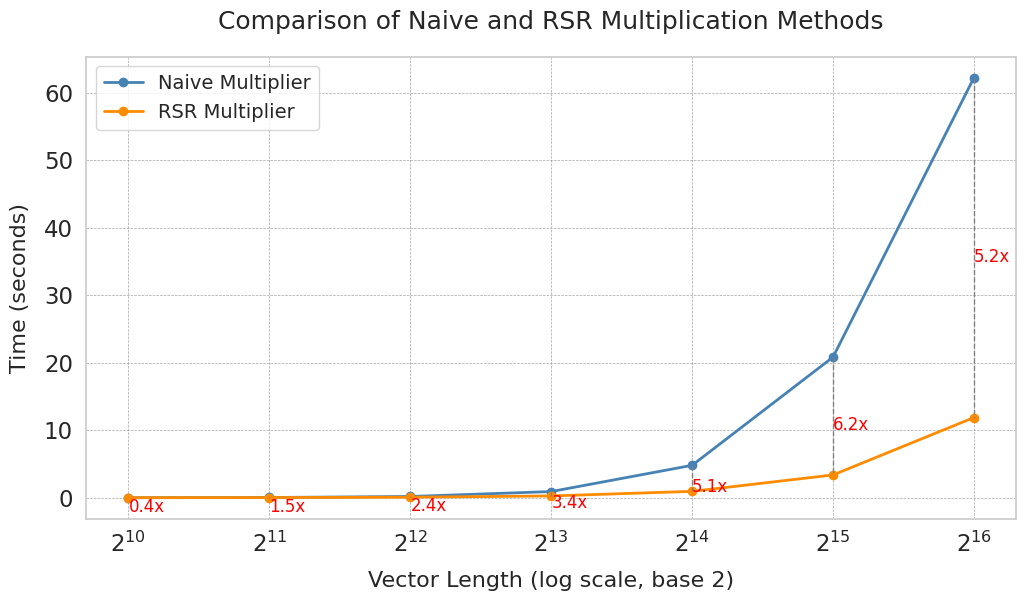

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator

# Set Seaborn style and scaling
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Example data (replace these with actual measurements)
vector_lengths = np.array([len(v) for v in vectors])  # Length of each vector
speedup = naive_times / rsr_times

# Create the plot with improved aesthetics
plt.figure(figsize=(12, 6))

# Plot times for NaiveMultiplier and RSRMultiplier
plt.plot(vector_lengths, naive_times, label='Naive Multiplier', marker='o', color='steelblue', markersize=6, linewidth=2)
plt.plot(vector_lengths, rsr_times, label='RSR Multiplier', marker='o', color='darkorange', markersize=6, linewidth=2)

# Draw lines connecting Naive and RSR times for each vector length to show speedup visually
for i in range(len(vector_lengths)):
    plt.plot([vector_lengths[i], vector_lengths[i]], [naive_times[i], rsr_times[i]], 
             color='gray', linestyle='--', linewidth=1)

# Label the points with the speedup factor
for i, length in enumerate(vector_lengths):
    plt.text(length, (naive_times[i] + rsr_times[i]) / 2, f"{speedup[i]:.1f}x",
             ha='left', va="top", color='red', fontsize=12)

# Configure the plot aesthetics
plt.xscale('log', base=2)
plt.xlabel('Vector Length (log scale, base 2)', fontsize=16, labelpad=10)
plt.ylabel('Time (seconds)', fontsize=16, labelpad=10)
plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
plt.legend(fontsize=14)

# Configure x-axis ticks for log base 2 and a clean grid
plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

# Save as EPS and display
plt.savefig("binary.eps", format='eps')
plt.show()


In [12]:
rsr_times

array([0.00821514, 0.02383544, 0.07728798, 0.26494324, 0.94406243])